<a href="https://colab.research.google.com/github/Anas182000/HOTEL-BOOKING-ANALYSIS/blob/main/ON_MY_OWN_HOTEL_BOOKING_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
# This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyze the data to discover important factors that govern the bookings.

During the vacation or leisure trip we oftenly prefer to book hotel before the
arrival date,so have we ever wondered why the prices are evenly higher than the normal days during  festive or vacation time and booking a hotel is a bit complex during those days, in this project we analyse the factors which are responsible for price fluctuation and booking hotel room 

**1)Understanding** **The**  **Problem** : Gathering important and meaningfull Information from each variable and anlalyse the problem 

**2**)**Data** **Cleaning** : We'll clean the provided dataset and manage the missing data, outliers and categorical coloumns.

**3**)

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#importing all the important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [ ]:
#Mounting the Drive 
path="/content/drive/MyDrive/HOTEL BOOKING ANALYSIS/Hotel Bookings.csv"
df=pd.read_csv(path)

In [ ]:
df.describe()   # shows the data frame data

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.info()   #it tells about the basics information of data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.shape  #shape of the Data Frame

(119390, 32)

In [ ]:
df.head()   #shows the data frame of n rows * by default it shows starting five rows data frame

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()   #shows the data frame of n rows * by default it shows last five rows data frame

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# **1**) Getting handfull and meaningfull insights from the Datasets

In order to get meaningfull data we have to explain the each coloumns in the dataset , this is a important step and will do this work on Excel Spreadsheet



1)is_canceled : Value indicating if the booking was canceled (1) or not (0)

2)lead_time :* Number of days that elapsed between the entering date of the booking into the PMS and the arrival date*

3)arrival_date_year : Year of arrival date

4)arrival_date_month : Month of arrival date

5)arrival_date_week_number : Week number of year for arrival date

6)arrival_date_day_of_month : Day of arrival date

7)stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

8)stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

9)adults : Number of adults

10)children : Number of children

11)babies : Number of babies

12)meal : Type of meal booked. Categories are presented in standard hospitality meal packages:

13)country : Country of origin.`

14)market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

15)distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

16)is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)

17)previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

18)previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

19)reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

20)assigned_room_type : Code for the type of room assigned to the booking.

21)booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

22)deposit_type : Indication on if the customer made a deposit to guarantee the booking.

23)agent : ID of the travel agency that made the booking

24)company : ID of the company/entity that made the booking or responsible for paying the booking.

25)days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer

26)customer_type : Type of booking, assuming one of four categories

27)adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

28)required_car_parking_spaces : Number of car parking spaces required by the customer

29)total_of_special_requests :* Number of special requests made by the customer (e.g. twin bed or high floor)*

30)hotel : Hotel(Resort Hotel or City Hotel)

31)reservation_status : Reservation last status, assuming one of three categories

a)Canceled – booking was canceled by the customer 

b)Check-Out – customer has checked in but already departed

c)No-Show – customer did not check-in and did inform the hotel of the reason why

32)reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [ ]:
df["reservation_status_date"]

0         2015-07-01
1         2015-07-01
2         2015-07-02
3         2015-07-02
4         2015-07-03
             ...    
119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 119390, dtype: object

In [ ]:
#Changing the object type to date time
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

In [ ]:
df["reservation_status_date"]

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

# First Of All we will Clean the Data by dropping the Null values 

In [ ]:
# Counting  the duplicate rows in the dataset provided
#What is duplicate observation-->Duplicate observations occur when two or more rows have the same values or nearly the same values
df.duplicated().value_counts()    #true means duplicate rows in the dataset

False    87396
True     31994
dtype: int64

# *1)Finding The Duplicate and Original Rows in a Dataset*

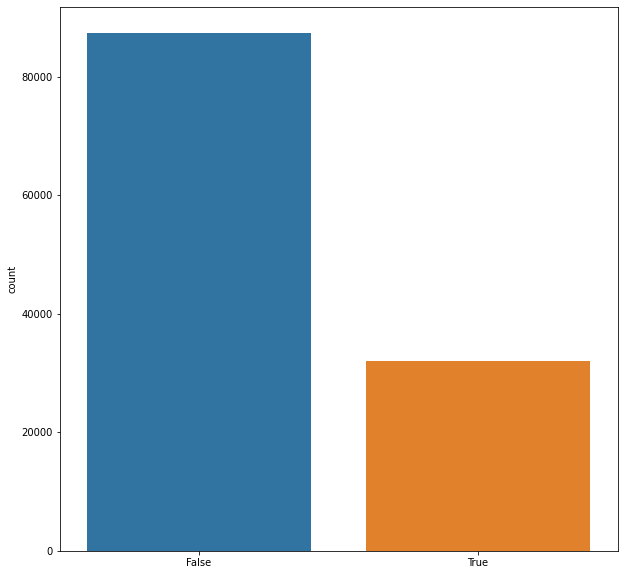

In [ ]:
#Now We will visualize the data of duplicate and original rows through the count pot
plt.figure(figsize=(10,10))
sns.countplot(x=df.duplicated())


# **Conclusion**  : There Are 31994   of duplicate rows in our dataset so we will drop that rows from our dataset

In [ ]:
#Now dropped the duplicate rows from the dataset
df= df.drop_duplicates()

In [ ]:
#Now again checking the number of rows and coloumn
print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

 We have total 87396 rows and 32 columns.


In [ ]:
#Looking for the Null/NaN/Missing Values :
df.isna().sum().sort_values(ascending=False)[:10]

company                   82137
agent                     12193
country                     452
children                      4
reserved_room_type            0
assigned_room_type            0
booking_changes               0
deposit_type                  0
hotel                         0
previous_cancellations        0
dtype: int64

In [ ]:
# Filling/replacing null values with 0.
null_columns=['agent','children','company']
for col in null_columns:
  df[col].fillna(0,inplace=True)


# Replacing NA values with 'others'
df['country'].fillna('others',inplace=True)


In [ ]:
#Successfully handled  Null Values
df.isna().sum().sort_values(ascending=False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

In [ ]:
df['arrival_date_month'].value_counts()

August       11257
July         10057
May           8355
April         7908
June          7765
March         7513
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: arrival_date_month, dtype: int64

## *2) Most preffered Month By Travellers To Travel*

Text(0.5, 1.0, 'pie chart for most preferred month')

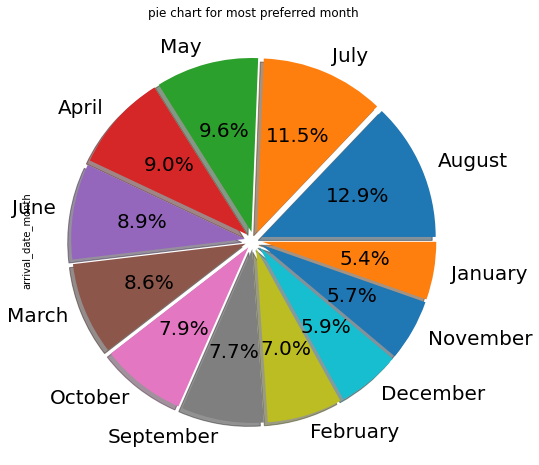

In [ ]:
df['arrival_date_month'].value_counts().plot.pie(explode=[0.05]*12, autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20) 
plt.title("pie chart for most preferred month")  

In [ ]:
df["hotel"].value_counts()

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

# *3) Most Preffered Hotel by Travellers*

Text(0.5, 1.0, 'Pie Chart for most preferred Hotel ')

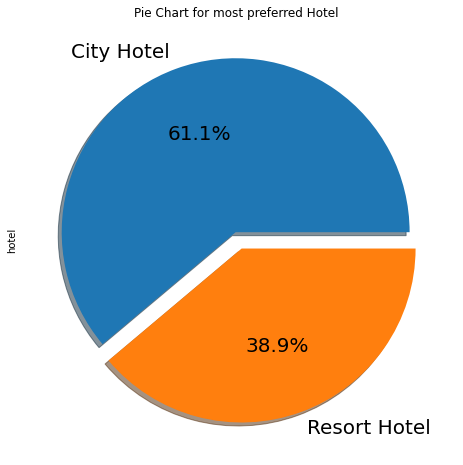

In [ ]:
df['hotel'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20) 
plt.title("Pie Chart for most preferred Hotel ")  

## **Conclusion**: Most Preferred Hotel By the travellers is City Hotel

# *4) Checking for the hotel which has better ADR(Average Daily Rate)*italicised text*

In [ ]:
#Grouping The Hotel ADR
group_by_hotel=df.groupby('hotel')

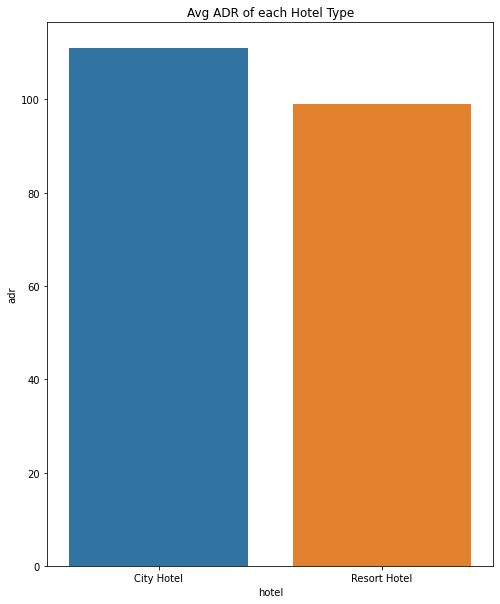

In [ ]:
#Calculating Highest ADR
highest_adr=group_by_hotel.mean().reset_index()

#Setting The Plot Size 
plt.figure(figsize=(8,10))

#Setting The Labels Of the Graph
plt.xlabel('Hotel Type')
plt.ylabel('ADR')
plt.title("Avg ADR of each Hotel Type")

#Plotting The Graph
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])

# **CONCLUSION** : More the ADR , More the Revenue so City Hotel generates More Revenue

#*5) From which country The Maximum Travellers come?*

ABBREVATIONS OF COUNTRIES :


GBR- Great Britian

PRT- Portugal

FRA- France

ESP- Spain

ITA -Itlay

IRL - Ireland

BRA -Brazil

DEU - Germany

NLD-Netherlands

BEL -Belgium

In [ ]:
Data_country=df["country"].value_counts()[:10]   # Collecting The Ten Most Visited Travellers Countries

Text(0.5, 1.0, 'Pie Chart for most Travellers Across The Globe')

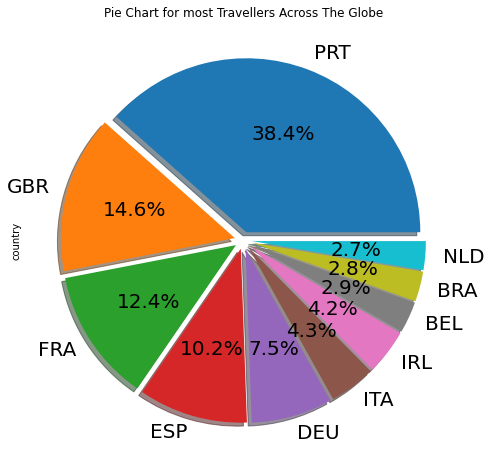

In [ ]:
#Visualizing Percentage Of Travellers  Through the Pie chart
Data_country.plot.pie(explode=[0.05]*10,autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title("Pie Chart for most Travellers Across The Globe")

# CONCLUSION : The maximum No of Travellers are from PRT(Portugal)

Text(0.5, 1.0, 'Number of guests from diffrent Countries')

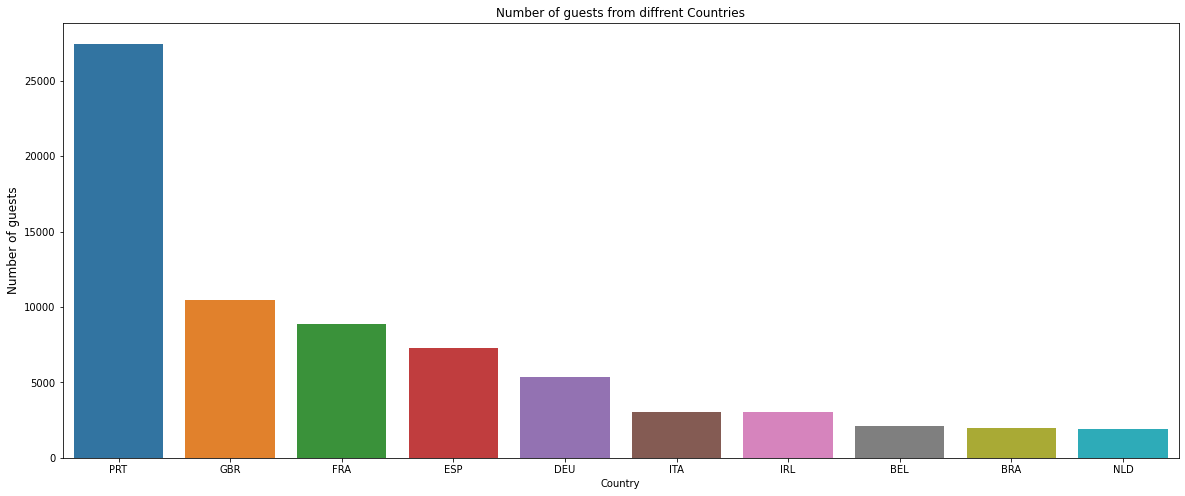

In [ ]:
# Counting the Travellers from various Countries
Data_country=df['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]


# Visualizing through by Plotting the Graph
plt.figure(figsize=(20,8))
sns.barplot(x=Data_country['country'],y=Data_country['count of guests'])
plt.xlabel('Country')
plt.ylabel('Number of guests',fontsize=12)
plt.title("Number of guests from diffrent Countries")

In [ ]:
df["customer_type"].value_counts()

Transient          71986
Transient-Party    11727
Contract            3139
Group                544
Name: customer_type, dtype: int64

# *6) Which Type of Customer has maximum Booking?*

Text(0.5, 1.0, 'Pie Chart for type of customer ')

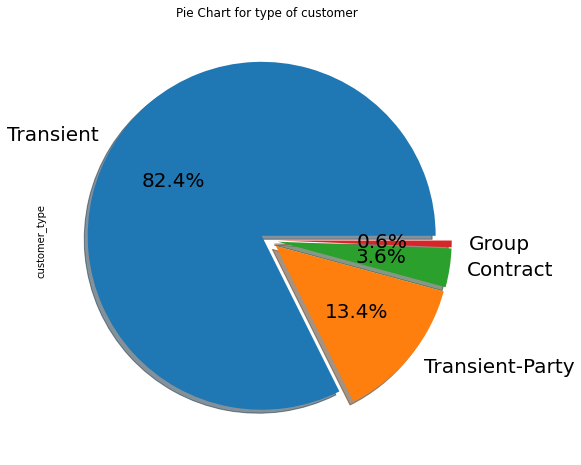

In [ ]:
df["customer_type"].value_counts().plot.pie(explode=[0.05]*4,autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title("Pie Chart for type of customer ")

# CONCLUSION : Transient type(82.4%) is the maximum type of customer in the Hotel booking

# *7)  Which agent has brought maximum no of Travellers?*

In [ ]:
# Highest number of booking made by Agents
Highest_bookings= df.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

 # As Agent 0 has NAN value and we replaced it with 0 so it has no booking so droping values og Agent 0
Highest_bookings.drop(Highest_bookings[Highest_bookings['agent']==0].index,inplace=True) 

# taking top 10 bookings made by agent
top_ten_highest_bookings=Highest_bookings[:10]

top_ten_highest_bookings

,agent,Most_Bookings
9,9.0,28759
174,240.0,13028
14,14.0,3349
7,7.0,3300
183,250.0,2779
175,241.0,1644
27,28.0,1502
8,8.0,1383
1,1.0,1232
6,6.0,1117


Text(0.5, 1.0, 'Most Bookings Made by the Agent')

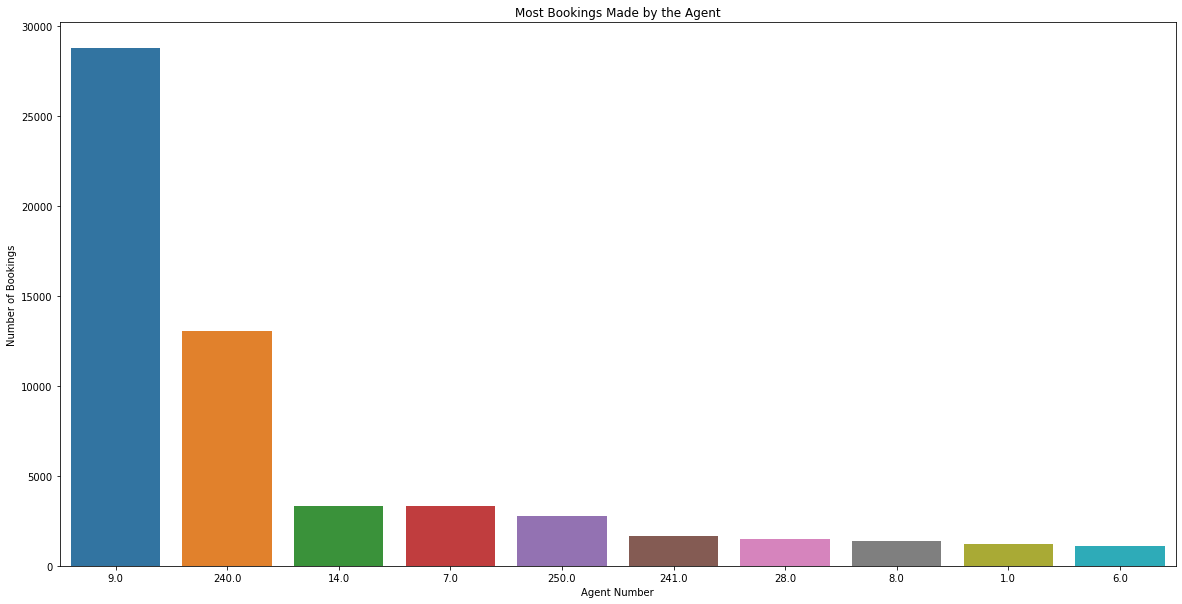

In [ ]:
#Visualizaing the Graph Through Bar Plot

plt.figure(figsize=(20,10))
sns.barplot(x=top_ten_highest_bookings['agent'],y=top_ten_highest_bookings['Most_Bookings'],order=top_ten_highest_bookings['agent'])
plt.xlabel('Agent Number')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the Agent")


# CONCLUSION : **Agent Number 9** has the Maximum number of Booking, so we can provide a better commission to Agent 9 to increase more booking from him

# *8)Which type Of meal has more demand by the travellers?*

Types of Meal in Hotels:

BB - (Bed and Breakfast)

HB- (Half Board)

FB- (Full Board)

SC- (Self Catering)


In [ ]:
df["meal"].value_counts()

BB           67978
SC            9481
HB            9085
Undefined      492
FB             360
Name: meal, dtype: int64

Text(0.5, 1.0, 'Most Preferred Meal Type')

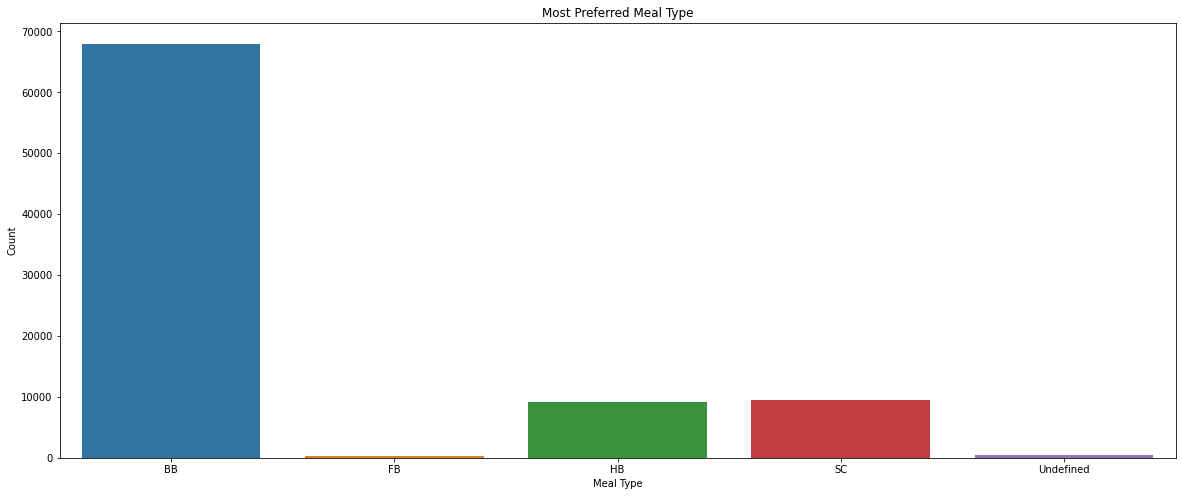

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x=df["meal"])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Most Preferred Meal Type")

Text(0.5, 1.0, 'Pie Chart for type of customer ')

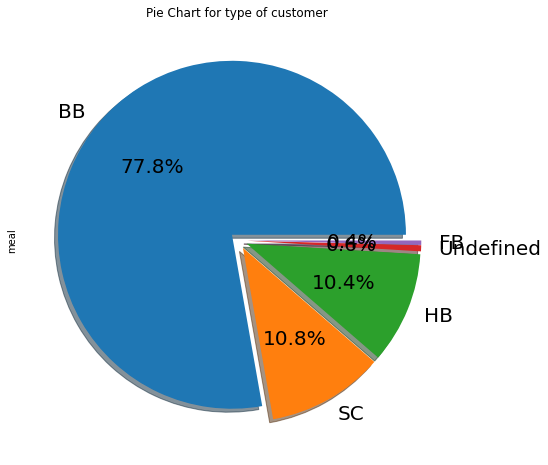

In [ ]:
#plotting a pie chart
df["meal"].value_counts().plot.pie(explode=[0.05]*5,autopct='%1.1f%%' , shadow=True, figsize=(10,8),fontsize=20)
plt.title("Pie Chart for type of customer ")


# CONCLUSION : BB(BED & BREAKFAST) Meal is Mostly Preferred By the Travellers

# *9) What is the Percentage of Cancelled Booking?*

0 Denotes--> Percentage of Booking Not cancelled 

1 Denotes--> Percentage of Booking Cancelled

In [ ]:
df["is_canceled"].value_counts()

0    63371
1    24025
Name: is_canceled, dtype: int64

Text(0.5, 1.0, 'Cancelled and Non Cancelled Booking')

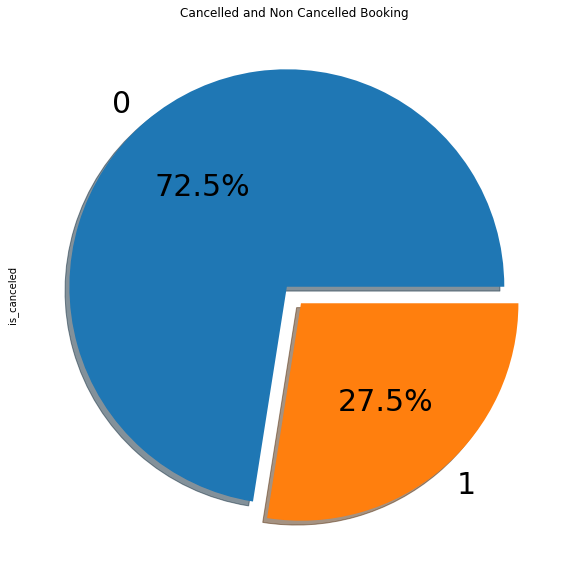

In [ ]:
df['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,10),fontsize=30)
plt.title("Cancelled and Non Cancelled Booking")

# CONCLUSION : Only 27.5% Booking is Cancelled

# *10) Most Reseved Room Type By the travellers?*

In [ ]:
#only taking the top six reserved room type
reserved_type_room=df["reserved_room_type"].value_counts().reset_index().rename(columns={'index': 'room_type','reserved_room_type': 'count_of_room'})[:6]




Text(0.5, 1.0, 'Most Preferred Meal Type')

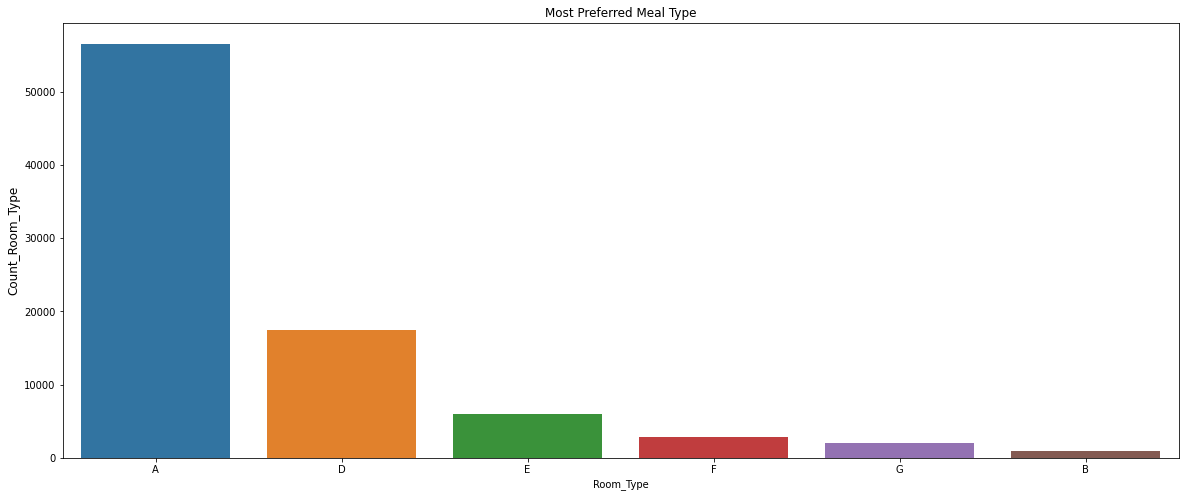

In [ ]:
#Visualizing The Data through bar plot
plt.figure(figsize=(20,8))
sns.barplot(x=reserved_type_room['room_type'],y=reserved_type_room['count_of_room'])
plt.xlabel('Room_Type')
plt.ylabel('Count_Room_Type',fontsize=12)
plt.title("Most Preferred Meal Type")

# CONCLUSION : The Room Type (A) is more reserved type room , we can increase the price of this Room to generate more Revenue 

# *11) Deposit Type?*

In [ ]:
df["deposit_type"].value_counts()

No Deposit    86251
Non Refund     1038
Refundable      107
Name: deposit_type, dtype: int64

Text(0.5, 1.0, 'Year Wise bookings')

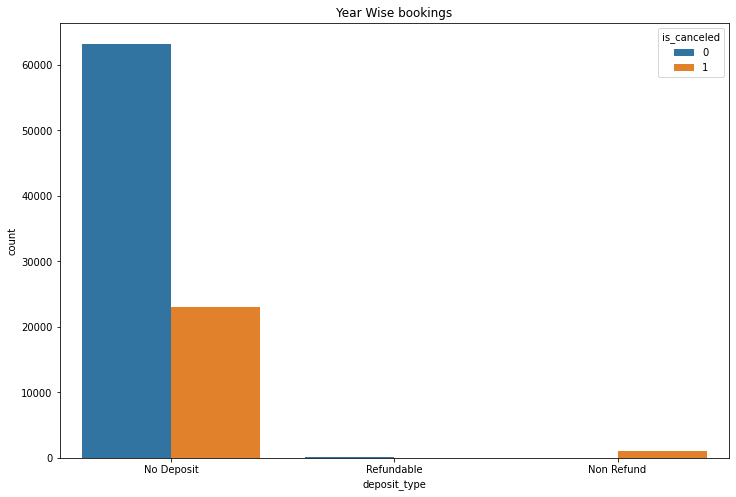

In [ ]:
# Visualize The Data Through Graph
#Setting The Plot size
plt.figure(figsize=(12,8))


sns.countplot(x=df['deposit_type'],hue=df['is_canceled'])
plt.title("Year Wise bookings")

# CONCLUSION : Deposit type --> (No Deposit) Has Maximum Cancellation as comparing To others Deposit type

In [ ]:
df["stays_in_weekend_nights"].value_counts()[:8]

0    35151
2    26414
1    22657
4     1734
3     1150
6      113
5       70
8       60
Name: stays_in_weekend_nights, dtype: int64

In [ ]:
df["stays_in_week_nights"].value_counts()

1     22191
2     20744
3     16259
5      9663
4      7874
0      6175
6      1379
10      972
7       967
8       613
9       219
15       68
11       50
20       41
12       40
13       27
14       25
19       21
21       15
16       13
22        7
25        6
18        6
30        5
17        4
24        2
40        2
33        1
42        1
50        1
32        1
26        1
34        1
35        1
41        1
Name: stays_in_week_nights, dtype: int64

# *12) Checking The Percentage of Repeated guest in Hotels?*


0----> Denotes Non_Repeated_Guests

1----> Denotes Repeated_Guests


In [ ]:
#Countng Repeated and Non Repeated Guests
df["is_repeated_guest"].value_counts()

0    83981
1     3415
Name: is_repeated_guest, dtype: int64

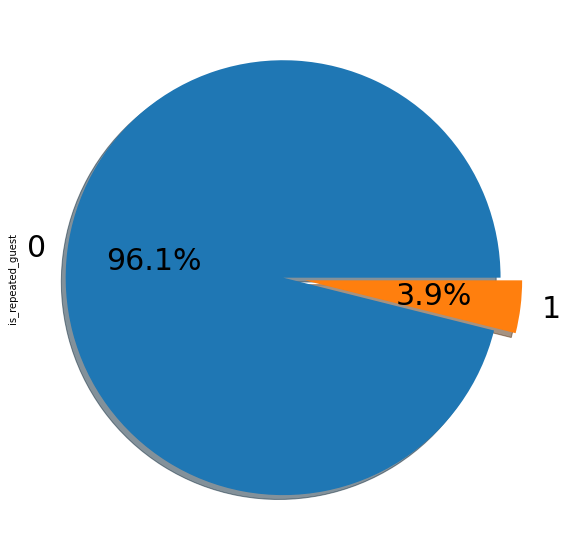

In [ ]:
#Visualizing The Repeated And Non Repeated Guests Through Pie Chart
df["is_repeated_guest"].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%', shadow=True, figsize=(10,10),fontsize=30)


# CONCLUSION : The retention Percentage of Hotels Is very Low (3.9%)

# *13) Checking The Car Parking spaces Required By Customers?*

In [ ]:
#Count of Car Parking Spaces
df["required_car_parking_spaces"].value_counts()

0    80083
1     7280
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

Text(0.5, 1.0, ' Percentage Of Car Parking Spaces Required ')

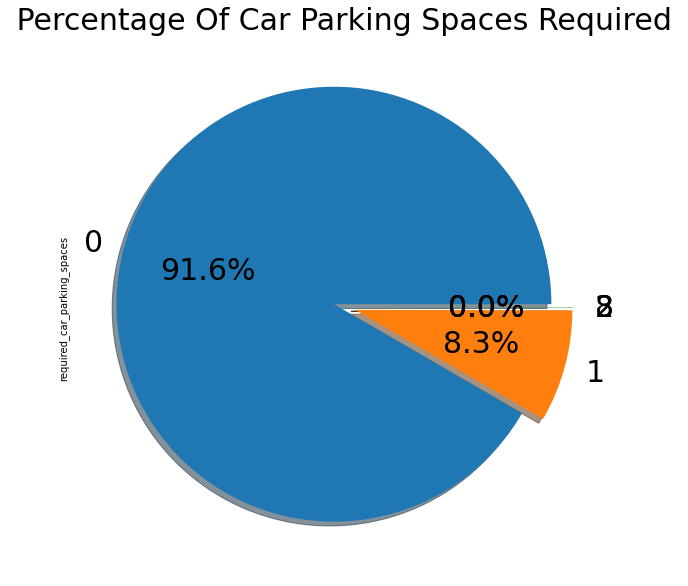

In [ ]:
#Visualize The Data Through By Pie graph
df["required_car_parking_spaces"].value_counts().plot.pie(explode=[0.05]*5,autopct='%1.1f%%', shadow=True, figsize=(10,10),fontsize=30)
plt.title(" Percentage Of Car Parking Spaces Required ",fontsize=30)

 

# CONCLUSION : Almost 91.6% customers don't need parking spaces so it's not a Major concern for Generating Revenue